<a href="https://colab.research.google.com/github/gowthami-08/DataAnyalsis-cogniz/blob/main/Top_Cuisines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Step 1: Load and Explore the Dataset
#Step 2: Count the Frequency of Each Cuisine
#Step 3: Find Top 3 Cuisines
#Step 4: Calculate Percentage of Restaurants

In [ ]:
#loading the dataset

from google.colab import files
uploaded = files.upload()

Saving Dataset .csv to Dataset  (1).csv


In [ ]:
#Step 1: Load and Explore the Dataset
import pandas as pd

df = pd.read_csv("Dataset .csv")

df.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [ ]:
#Step 2: Count the Frequency of Each Cuisine
print(df.columns)

cuisine_col = 'Cuisines'

df = df.dropna(subset=[cuisine_col])

df[cuisine_col] = df[cuisine_col].astype(str)
df['Cuisine_List'] = df[cuisine_col].str.split(', ')


df_exploded = df.explode('Cuisine_List')


top_cuisines = df_exploded['Cuisine_List'].value_counts().head(3)
print("Top 3 Cuisines:")
print(top_cuisines)

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')
Top 3 Cuisines:
Cuisine_List
North Indian    3960
Chinese         2735
Fast Food       1986
Name: count, dtype: int64


/tmp/ipython-input-11-1677491872.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[cuisine_col] = df[cuisine_col].astype(str)
/tmp/ipython-input-11-1677491872.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cuisine_List'] = df[cuisine_col].str.split(', ')


In [ ]:
#Step 3: Calculate Percentages
total_restaurants = df.shape[0]


percentages = {}
for cuisine in top_cuisines.index:
    count = df_exploded[df_exploded['Cuisine_List'] == cuisine]['Cuisine_List'].count()
    percentages[cuisine] = round((count / total_restaurants) * 100, 2)

print("Percentage of Restaurants Serving Top Cuisines:")
for cuisine, pct in percentages.items():
    print(f"{cuisine}: {pct}%")

Percentage of Restaurants Serving Top Cuisines:
North Indian: 41.5%
Chinese: 28.66%
Fast Food: 20.81%


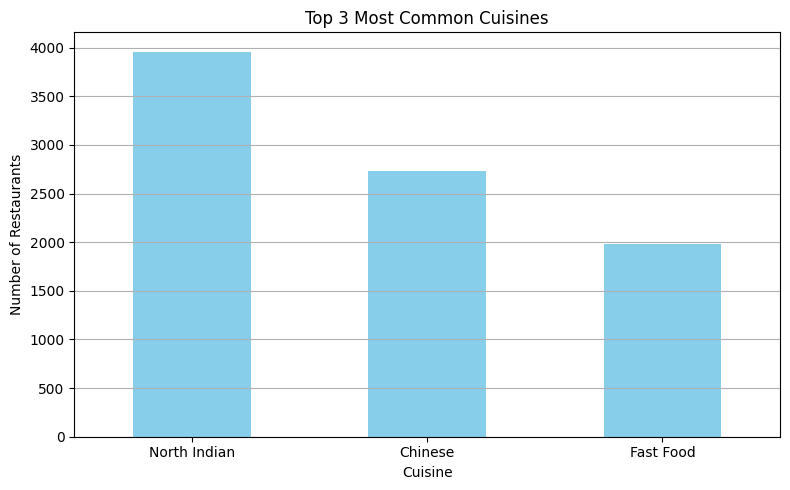

In [ ]:
#Step 4: Visualize (Bar Chart)
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
top_cuisines.plot(kind='bar', color='skyblue')
plt.title("Top 3 Most Common Cuisines")
plt.xlabel("Cuisine")
plt.ylabel("Number of Restaurants")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

In [ ]:
#Observations and Summary

#Top 3 Most Common Cuisines
#Cuisine	         Number of Restaurants
#North Indian	    3960
#Chinese	          2735
#Fast Food	        1986

#Percentage of Restaurants Serving Each Cuisine
#Cuisine	        Percentage (%)
#North Indian	    41.5%
#Chinese	        28.66%
#Fast Food	      20.81%


